In [1]:
# Imports from the tf-idf WS, I don't think all are used, and some could be pruned.
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import string
from nltk.corpus import stopwords
import math
from collections import Counter
import pprint 
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data_assignment.csv')
df['SalaryRange']= [str(x) + ' - ' + str(y) for x, y in zip(df['LowestSalary'], df['HighestSalary'])]
df['Date'] = df['Date'].str.split('T').str[0]
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = [x.strftime("%b") for x in df['Date']]
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Day'] = [x.strftime("%d") for x in df['Date']]
#1. ANALYSE BY COMPARISON
#Choose your two favourite cities/locations.
#Which city has more jobs?How many jobs of each type (casual, fulltime, etc.) in each city?
bris_jobs = df[df['Location'] == 'Brisbane']
goldie_jobs = df[df['Location'] == 'Gold Coast']
bris_jobs.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Month,DayOfWeek,Day
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0 - 30,Oct,Sunday,07
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,0 - 30,Oct,Sunday,07
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,0 - 30,Oct,Sunday,07
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,0 - 30,Oct,Sunday,07
40,37404400,Project Officer,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN,0 - 30,Oct,Sunday,07


In [3]:
len(bris_jobs)

16538

In [4]:
len(goldie_jobs)

2758

In [5]:
bris_jobs['JobType'].value_counts()

Full Time          10431
Contract/Temp       3164
Casual/Vacation     1543
Part Time            988
Name: JobType, dtype: int64

In [6]:
goldie_jobs['JobType'].value_counts()

Full Time          1617
Casual/Vacation     539
Contract/Temp       299
Part Time           244
Name: JobType, dtype: int64

In [7]:
#In each city, which are the top 5 job sectors? 
#How many jobs are there in each sector?
bris_class = bris_jobs['Classification'].value_counts()[:5]
bris_class

Information & Communication Technology    2041
Trades & Services                         1627
Healthcare & Medical                      1341
Manufacturing, Transport & Logistics      1338
Hospitality & Tourism                     1032
Name: Classification, dtype: int64

In [8]:
goldie_class = goldie_jobs['Classification'].value_counts()[:5]
goldie_class

Hospitality & Tourism                   467
Trades & Services                       363
Healthcare & Medical                    339
Retail & Consumer Products              180
Manufacturing, Transport & Logistics    176
Name: Classification, dtype: int64

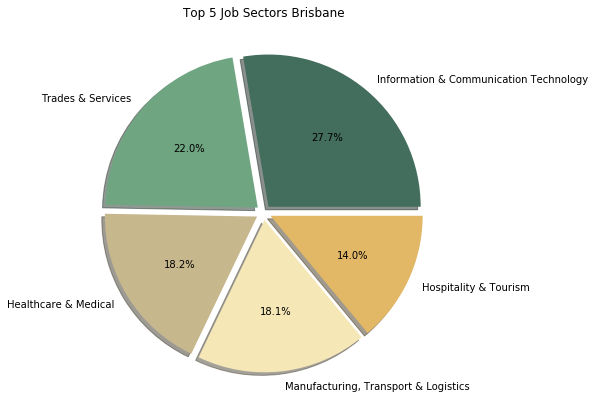

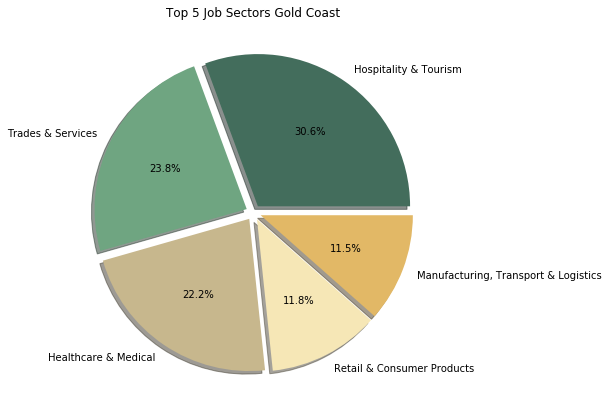

In [9]:
#Visualise the top 5 job sectors in pie chart for each city.
my_explode = (0.05, 0.05, 0.05, 0.05 ,0.05)
my_colours = ['#436d5c', '#6fa581', '#c7b78d', '#f6e7b6', '#e2b866']
#Brisbane
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(bris_class, labels=bris_class.index, autopct='%1.1f%%', shadow=True, colors=my_colours, explode=my_explode)
ax.set_title('Top 5 Job Sectors Brisbane')
plt.show()
#Gold Coast
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(goldie_class, labels=goldie_class.index, autopct='%1.1f%%', shadow=True, colors=my_colours, explode=my_explode)
ax.set_title('Top 5 Job Sectors Gold Coast')
plt.show()

In [10]:
#In each city, list the job salary range with the corresponding number of jobs. 
#Which city is more well-paid?
#Brisbane Salary Range Counts
bris_jobs['SalaryRange'].value_counts()

0 - 30       2962
40 - 50      2271
60 - 70      1611
100 - 120    1494
50 - 60      1481
70 - 80      1384
80 - 100     1317
150 - 200    1202
30 - 40      1192
120 - 150    1076
200 - 250     548
Name: SalaryRange, dtype: int64

In [11]:
#Finding Percentage of Salary Ranges for better comparison with GC
(bris_jobs['SalaryRange'].value_counts()/len(bris_jobs))*100

0 - 30       17.910267
40 - 50      13.732011
60 - 70       9.741202
100 - 120     9.033740
50 - 60       8.955134
70 - 80       8.368606
80 - 100      7.963478
150 - 200     7.268110
30 - 40       7.207643
120 - 150     6.506228
200 - 250     3.313581
Name: SalaryRange, dtype: float64

In [12]:
#Gold Coast Salary Range counts
goldie_jobs['SalaryRange'].value_counts()

40 - 50      630
0 - 30       521
30 - 40      375
50 - 60      298
60 - 70      285
70 - 80      196
80 - 100     138
100 - 120    123
150 - 200     81
120 - 150     69
200 - 250     42
Name: SalaryRange, dtype: int64

In [13]:
#Finding Percentage of Salary Ranges for better comparison with Bris
(goldie_jobs['SalaryRange'].value_counts()/len(goldie_jobs))*100

40 - 50      22.842640
0 - 30       18.890500
30 - 40      13.596809
50 - 60      10.804931
60 - 70      10.333575
70 - 80       7.106599
80 - 100      5.003626
100 - 120     4.459753
150 - 200     2.936911
120 - 150     2.501813
200 - 250     1.522843
Name: SalaryRange, dtype: float64

In [14]:

#LEAVING BLANK FOR READABILITY. BELOW IS INFORMATION FOR BRISBANE


In [15]:
#List top 5 companies in each city? Which sectors do they belong to?
bris_jobs['Company'].value_counts()[:5]

Jora Local                      238
u&u. Recruitment Partners       191
Hudson                          187
The University of Queensland    180
Programmed Skilled Workforce    171
Name: Company, dtype: int64

In [16]:
#Finding Jora Local classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'Jora Local']['Classification'].value_counts()

Hospitality & Tourism         235
Trades & Services               2
Retail & Consumer Products      1
Name: Classification, dtype: int64

In [17]:
#Finding u&u classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'u&u. Recruitment Partners']['Classification'].value_counts()

Information & Communication Technology    85
Accounting                                26
Legal                                     17
Human Resources & Recruitment             12
Marketing & Communications                11
Administration & Office Support            8
Construction                               6
Engineering                                5
Sales                                      5
Consulting & Strategy                      3
Banking & Financial Services               3
Design & Architecture                      2
Government & Defence                       2
Manufacturing, Transport & Logistics       2
Community Services & Development           1
Education & Training                       1
Mining, Resources & Energy                 1
Call Centre & Customer Service             1
Name: Classification, dtype: int64

In [18]:
#Finding Hudson classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'Hudson']['Classification'].value_counts()

Information & Communication Technology    116
Administration & Office Support            21
Human Resources & Recruitment               9
Government & Defence                        7
Accounting                                  7
Engineering                                 5
Marketing & Communications                  4
Consulting & Strategy                       4
Call Centre & Customer Service              4
Education & Training                        3
Hospitality & Tourism                       2
Sales                                       1
Design & Architecture                       1
CEO & General Management                    1
Community Services & Development            1
Manufacturing, Transport & Logistics        1
Name: Classification, dtype: int64

In [19]:
#Finding UQ classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'The University of Queensland']['Classification'].value_counts()

Education & Training                      121
Science & Technology                       12
Healthcare & Medical                       10
Administration & Office Support             9
Engineering                                 8
Information & Communication Technology      6
Marketing & Communications                  3
Accounting                                  3
Human Resources & Recruitment               2
Design & Architecture                       1
Mining, Resources & Energy                  1
Advertising, Arts & Media                   1
Real Estate & Property                      1
Consulting & Strategy                       1
Community Services & Development            1
Name: Classification, dtype: int64

In [20]:
#Finding Programmed Skilled WF classification counts to find what sector is the majority
bris_jobs[bris_jobs['Company'] == 'Programmed Skilled Workforce']['Classification'].value_counts()

Manufacturing, Transport & Logistics      86
Trades & Services                         74
Construction                               4
Administration & Office Support            4
Information & Communication Technology     1
Sport & Recreation                         1
Human Resources & Recruitment              1
Name: Classification, dtype: int64

In [21]:

#LEAVING BLANK FOR READABILITY. BELOW IS INFORMATION FOR GOLD COAST


In [22]:
goldie_jobs['Company'].value_counts()[:5]

Jora Local                              139
Gold Coast Hospital & Health Service     64
Hays Trades & Labour                     45
City of Gold Coast                       30
Griffith University                      28
Name: Company, dtype: int64

In [23]:
#Finding Jora Local classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Jora Local']['Classification'].value_counts()

Hospitality & Tourism         134
Retail & Consumer Products      3
Trades & Services               2
Name: Classification, dtype: int64

In [24]:
#Finding GC Hospital classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Gold Coast Hospital & Health Service']['Classification'].value_counts()

Government & Defence               31
Healthcare & Medical               24
Administration & Office Support     3
Legal                               2
Banking & Financial Services        2
Hospitality & Tourism               1
Education & Training                1
Name: Classification, dtype: int64

In [25]:
#Finding Hays classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Hays Trades & Labour']['Classification'].value_counts()

Trades & Services                       40
Manufacturing, Transport & Logistics     2
Sport & Recreation                       2
Construction                             1
Name: Classification, dtype: int64

In [26]:
#Finding City of GC classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'City of Gold Coast']['Classification'].value_counts()

Government & Defence                      15
Engineering                                7
Information & Communication Technology     2
Education & Training                       2
Consulting & Strategy                      1
Design & Architecture                      1
CEO & General Management                   1
Sport & Recreation                         1
Name: Classification, dtype: int64

In [27]:
#Finding GU classification counts to find what sector is the majority
goldie_jobs[goldie_jobs['Company'] == 'Griffith University']['Classification'].value_counts()

Education & Training                      21
Administration & Office Support            4
Banking & Financial Services               1
Healthcare & Medical                       1
Information & Communication Technology     1
Name: Classification, dtype: int64

In [28]:

#LEAVING BLANK FOR READABILITY


In [29]:
#Between 2 cities, which do you think it is better for employees. Explain your choice.

In [30]:
#2. ANALYSE BY TIME

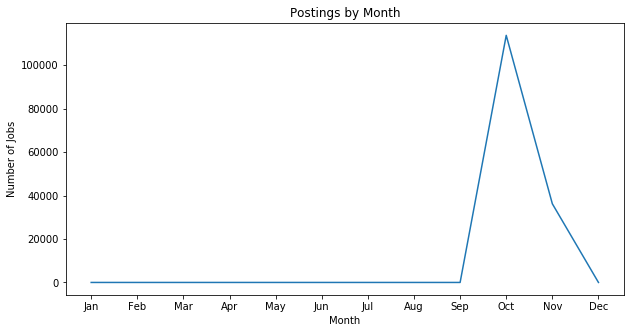

In [31]:
#Visualise the number of job posts by month.
month_counts = df['Month'].value_counts()
month_series = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0], index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])
#Below can probably be done better, but it works.
month_series['Oct'] = month_counts['Oct']
month_series['Nov'] = month_counts['Nov']
plt.figure(figsize=(10,5))
plt.axes().set(xlabel='Month', ylabel='Number of Jobs', title='Postings by Month')
plt.plot(month_series)

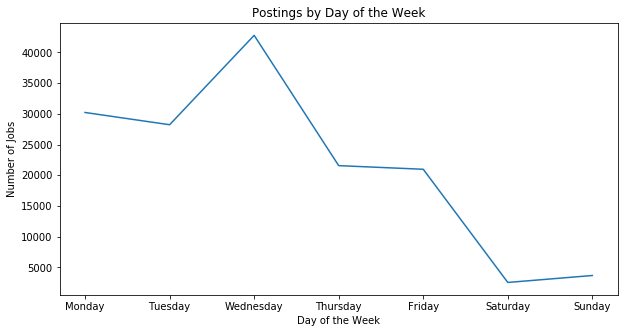

In [32]:
#Visualise the number of job posts by day of week.
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,5))
plt.axes().set(xlabel='Day of the Week', ylabel='Number of Jobs', title='Postings by Day of the Week')
plt.plot(df['DayOfWeek'].value_counts().reindex(days_of_week))

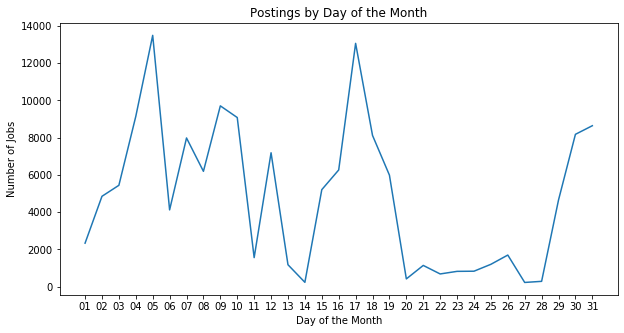

In [33]:
#Visualise the number of job posts by day of the month.
day_numeric_list_2 = [str(i) for i in range(10,32)]
day_numeric_list_1 = ['0' + str(i) for i in range(1,10)]
day_numeric_list = day_numeric_list_1 + day_numeric_list_2
plt.figure(figsize=(10,5))
plt.axes().set(xlabel='Day of the Month', ylabel='Number of Jobs', title='Postings by Day of the Month')
plt.plot(df['Day'].value_counts().reindex(day_numeric_list))

In [34]:
#Visualise trending of the job postings for the big cities.
df['Location'].value_counts()[:10]

Sydney                          46357
Melbourne                       35315
Brisbane                        16538
Perth                            9913
Adelaide                         4998
ACT                              4816
Newcastle, Maitland & Hunter     3099
Gold Coast                       2758
South West Coast VIC             1383
Mackay & Coalfields              1316
Name: Location, dtype: int64

In [35]:
syd_jobs = df[df['Location'] == 'Sydney']
melb_jobs = df[df['Location'] == 'Melbourne']
perth_jobs = df[df['Location'] == 'Perth']
adel_jobs = df[df['Location'] == 'Adelaide']
act_jobs = df[df['Location'] == 'ACT']
newie_jobs = df[df['Location'] == 'Newcastle, Maitland & Hunter']

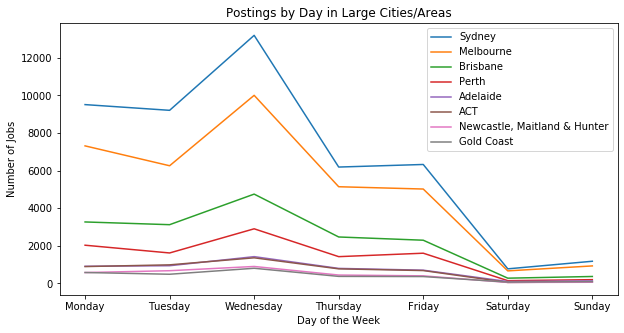

In [36]:
plt.figure(figsize=(10,5))
plt.axes().set(xlabel='Day of the Week', ylabel='Number of Jobs', title='Postings by Day in Large Cities/Areas')
plt.plot(syd_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Sydney')
plt.plot(melb_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Melbourne')
plt.plot(bris_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Brisbane')
plt.plot(perth_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Perth')
plt.plot(adel_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Adelaide')
plt.plot(act_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='ACT')
plt.plot(newie_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Newcastle, Maitland & Hunter')
plt.plot(goldie_jobs['DayOfWeek'].value_counts().reindex(days_of_week), label='Gold Coast')

plt.legend()

C:\Programming\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


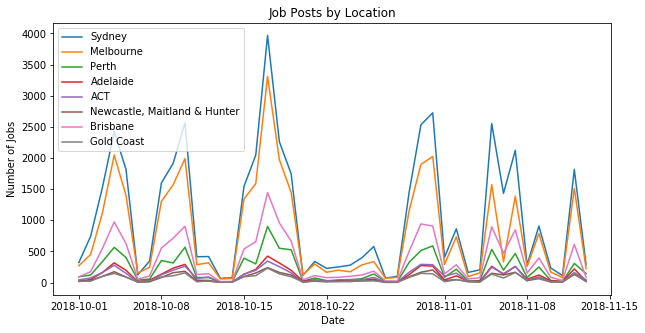

In [37]:
syd_jobs2 = syd_jobs.groupby('Date').count()
syd_jobs2['Count'] = syd_jobs2['Id']
syd_jobs2 = syd_jobs2.sort_values(by=['Date'])

melb_jobs2 = melb_jobs.groupby('Date').count()
melb_jobs2['Count'] = melb_jobs2['Id']
melb_jobs2 = melb_jobs2.sort_values(by=['Date'])

perth_jobs2 = perth_jobs.groupby('Date').count()
perth_jobs2['Count'] = perth_jobs2['Id']
perth_jobs2 = perth_jobs2.sort_values(by=['Date'])

adel_jobs2 = adel_jobs.groupby('Date').count()
adel_jobs2['Count'] = adel_jobs2['Id']
adel_jobs2 = adel_jobs2.sort_values(by=['Date'])

act_jobs2 = act_jobs.groupby('Date').count()
act_jobs2['Count'] = act_jobs2['Id']
act_jobs2 = act_jobs2.sort_values(by=['Date'])

newie_jobs2 = newie_jobs.groupby('Date').count()
newie_jobs2['Count'] = newie_jobs2['Id']
newie_jobs2 = newie_jobs2.sort_values(by=['Date'])

bris_jobs2 = bris_jobs.groupby('Date').count()
bris_jobs2['Count'] = bris_jobs2['Id']
bris_jobs2 = bris_jobs2.sort_values(by=['Date'])

goldie_jobs2 = goldie_jobs.groupby('Date').count()
goldie_jobs2['Count'] = goldie_jobs2['Id']
goldie_jobs2 = goldie_jobs2.sort_values(by=['Date'])

plt.figure(figsize=(10,5))
plt.axes().set(xlabel='Date', ylabel='Number of Jobs', title='Job Posts by Location')
plt.plot(syd_jobs2['Count'], label='Sydney')
plt.plot(melb_jobs2['Count'], label='Melbourne')
plt.plot(perth_jobs2['Count'], label='Perth')
plt.plot(adel_jobs2['Count'], label='Adelaide')
plt.plot(act_jobs2['Count'], label='ACT')
plt.plot(newie_jobs2['Count'], label='Newcastle, Maitland & Hunter')
plt.plot(bris_jobs2['Count'], label='Brisbane')
plt.plot(goldie_jobs2['Count'], label='Gold Coast')

plt.legend()
plt.show()

In [38]:
#Based on the above charts, provide your observation about the number of job posts over time.
#Give your own conclusion.

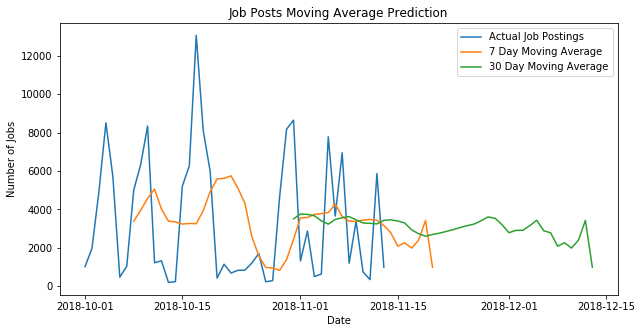

In [39]:
#3. Forecasting and Skill Extractions
#Using moving average for 7 days and 30 days to predict the number of jobs postings and visualise them in a line chart.
#Which one creates a better prediction? Explain your choice.

# Actual job postings per date.
df_Actual = df.groupby('Date').count()
df_Actual['Count'] = df_Actual['Id']
df_Actual = df_Actual.sort_values(by=['Date'])

def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Date','Count'])
    num_df = len(df)
    minDate = df.index.min()
    for m in range(0, num_df + to_period):
        if m < k:
            #prediction = float('nan')
            pass
        else:
            history = df['Count'][m-k:m]
            prediction = history.mean()
            moving_average_df.loc[m] = [(minDate + pd.Timedelta(str(m) + ' day')), prediction]
    
    moving_average_df['Date'] = pd.to_datetime(moving_average_df['Date'])
    moving_average_df.index = moving_average_df['Date']
    return moving_average_df


df_MA_k7 = moving_average(df_Actual, 7, 7)
df_MA_k30 = moving_average(df_Actual, 30, 30)
#df_MA_k7
#df_MA_k30
#df_Actual

plt.figure(figsize=(10,5))
plt.axes().set(xlabel='Date', ylabel='Number of Jobs', title='Job Posts Moving Average Prediction')
plt.plot(df_Actual['Count'], label='Actual Job Postings')
plt.plot(df_MA_k7['Count'], label='7 Day Moving Average')
plt.plot(df_MA_k30['Count'], label='30 Day Moving Average')
plt.legend()
plt.show()

In [40]:
MSE = (df_Actual['Count'][(df_Actual.index.min() + pd.Timedelta('7 day')):df_Actual.index.max()] - df_MA_k7['Count'][(df_Actual.index.min() + pd.Timedelta('7 day')):df_Actual.index.max()])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Moving Average with k = 7", MSE))
MSE = (df_Actual['Count'][(df_Actual.index.min() + pd.Timedelta('30 day')):df_Actual.index.max()] - df_MA_k30['Count'][(df_Actual.index.min() + pd.Timedelta('30 day')):df_Actual.index.max()])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Moving Average with k = 30", MSE))

MSE = (df_Actual['Count'][(df_Actual.index.min() + pd.Timedelta('30 day')):df_Actual.index.max()] - df_MA_k7['Count'][(df_Actual.index.min() + pd.Timedelta('30 day')):df_Actual.index.max()])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Moving Average with k = 7, same period as k = 30", MSE))


MSE of Moving Average with k = 7: 13027110.344732488
MSE of Moving Average with k = 30: 8341691.556349208
MSE of Moving Average with k = 7, same period as k = 30: 8846145.112244897


In [41]:
#Choose your favourtie job sector/sub-sector, then use TF/IDF to extract important keywords.
#Visualise in word cloud chart.

nltk.download('punkt')
nltk.download('stopwords')
pp = pprint.PrettyPrinter(indent=4)

def normalize(document):
    text = "".join([ch for ch in document if ch not in string.punctuation])

    tokens = nltk.word_tokenize(text)

    stemmer = PorterStemmer()

    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

df_WordCloud = df[df["Classification"] == "Information & Communication Technology"]
df_WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Colin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Colin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Month,DayOfWeek,Day
89,37404291,Technical Support Engineer,FTI Consulting,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Act as an advisor to staff in all practice are...,NaN,0,30,NaN,0 - 30,Oct,Sunday,07
96,37404325,Business Development Manager,TPG Telecom Limited,2018-10-07,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Sales - Pre & Post,Looking to get your foot in the door in a care...,NaN,0,30,NaN,0 - 30,Oct,Sunday,07
127,37404230,Systems Engineer,Humanised Group,2018-10-07,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time,0 - 30,Oct,Sunday,07
130,37404370,Operations Delivery Manager,Woolworths Group,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ready for a challenge? Opportunity to be a par...,<p> </p>\n <div></div>\n <div></...,0,30,Full Time,0 - 30,Oct,Sunday,07
133,37404174,Technical Support Executive - $70K + Super - C...,Command Group,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Do you have strong technical support skills? L...,<div>\n <ul>\n <li>Great s...,0,30,Full Time,0 - 30,Oct,Sunday,07
137,37404357,Senior Business Development Manager,Smart Technology Recruitment Pty Ltd,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Sales - Pre & Post,Business Development role. IOT High Tech. Nati...,<p>Our client is a publicly listed company on ...,0,30,Full Time,0 - 30,Oct,Sunday,07
143,37404368,Senior Manager - Security Incident Response Ma...,Woolworths Group,2018-10-07,Sydney,North West & Hills District,Information & Communication Technology,Security,Senior Manager - Security Incident Management ...,<p> </p>\n <div></div>\n <div></...,0,30,Full Time,0 - 30,Oct,Sunday,07
146,37404367,Security Incident Response Specialist,Woolworths Group,2018-10-07,Sydney,Parramatta & Western Suburbs,Information & Communication Technology,Security,Security Incident Response Specialist Location...,<p> </p>\n <div></div>\n <div></...,0,30,Full Time,0 - 30,Oct,Sunday,07
148,37404369,Cloud Security Architect,Woolworths Group,2018-10-07,Sydney,North West & Hills District,Information & Communication Technology,Security,About Woolworths IT team As Australia's bigg...,<p> </p>\n <div></div>\n <div></...,0,30,Full Time,0 - 30,Oct,Sunday,07
156,37404252,SAM Consultant,Insight Enterprises Australia Pty Ltd,2018-10-07,Sydney,Southern Suburbs & Sutherland Shire,Information & Communication Technology,Consultants,Great opportunity for SAM Consultant with Flex...,There has never been a better time than now to...,0,30,Full Time,0 - 30,Oct,Sunday,07


In [42]:
original_documents = [str(x).strip() for x in df_WordCloud['Requirement']] 
documents = [normalize(d).split() for d in original_documents]


In [43]:
print(documents[20])


['veri', 'success', 'ble', 'technolog', 'compani', 'need', 'a', 'talent', 'ui', 'develop', 'to', 'spearhead', 'entir', 'websit', 'transform', 'in', 'javascriptangular', 'html', 'and', 'css']


In [44]:
## The manual method from the WS.
# The following few cells are commented out for processing efficency, as the SciKit method is used for the final cloud.

#flat_list = [word for doc in documents for word in doc]

#words = [word for word in flat_list if word not in stopwords.words('english')]

#counts = Counter(words)
#vocabulary = counts.most_common(500)
#vocabulary = [x[0] for x in vocabulary]
#assert len(vocabulary) == 500

## vocabulary.sort()
#vocabulary[:5]


In [45]:
def tf(vocabulary, documents):
    matrix = [0] * len(documents)
    for i, document in enumerate(documents):
        counts = Counter(document)
        matrix[i] = [0] * len(vocabulary)
        for j, term in enumerate(vocabulary):
            matrix[i][j] = counts[term]
    return matrix

#tf = tf(vocabulary, documents)
#np.array(vocabulary)[np.where(np.array(tf[1]) > 0)], np.array(tf[1])[np.where(np.array(tf[1]) > 0)]

In [46]:
def idf(vocabulary, documents):    
    idf = {}
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents / sum(term in document for document in documents), 2)
    return idf

#idf = idf(vocabulary, documents)
#[idf[key] for key in vocabulary[:5]]

In [47]:
def vectorize(document, vocabulary, idf):
    vector = [0]*len(vocabulary)
    counts = Counter(document)
    for i,term in enumerate(vocabulary):
        vector[i] = idf[term] * counts[term]
    return vector

#document_vectors = [vectorize(s, vocabulary, idf) for s in documents]
#np.array(vocabulary)[np.where(np.array(document_vectors[1]) > 0)], np.array(document_vectors[1])[np.where(np.array(document_vectors[1]) > 0)]

In [48]:
# The SciKit method

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform(original_documents) 

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

[('opportunity', 617.4735314496552), ('join', 607.7457463401777), ('contract', 606.9671017180993), ('team', 582.9469587925814), ('business', 518.8158465193815)]


In [49]:
# SciKit method is easier to extract, being reverse ordered and joining terms and their vector as a tuple within a single container, rather than two separate arrays.
# Top 100 words.
print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:100])

# Assess whether to expand word cloud further.
#print(sorted(words_freq, key = lambda x: x[1], reverse=True)[100:200])

# https://wordart.com/dsgr2lq15jko/word-art

[('opportunity', 617.4735314496552), ('join', 607.7457463401777), ('contract', 606.9671017180993), ('team', 582.9469587925814), ('business', 518.8158465193815), ('looking', 494.8276030947439), ('project', 494.0245365274245), ('work', 491.21036846740026), ('role', 455.0987529889086), ('experience', 441.0580721109568), ('developer', 428.42684646289996), ('experienced', 425.4038977008246), ('analyst', 402.32257757901016), ('month', 396.37255120560025), ('seeking', 378.7965540004766), ('support', 374.14265997373786), ('senior', 372.4588461905108), ('based', 370.3519185680903), ('client', 355.96557261360624), ('data', 355.78780088383695), ('manager', 353.65575277356555), ('cbd', 330.630178166219), ('engineer', 329.9652960119465), ('exciting', 328.74139062927145), ('leading', 317.0412632113887), ('sydney', 313.02160189959864), ('government', 308.28860290528263), ('organisation', 305.0123144563098), ('large', 303.87756943402496), ('company', 287.47385969383305), ('services', 283.7061772429337

In [50]:
#Discussion
#Scenario 1
#Need to find possible major at Uni which can guarantee a job in QLD with income >= 80k
# TK method:
qld_locations = ['Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast', 'Hervey Bay & Fraser Coast', 'Toowoomba & Darling Downs', 'Cairns & Far North', 'Northern QLD', 'Rockhampton & Capricorn Coast', 'Gladstone & Central QLD', 'Somerset & Lockyer', 'Western QLD', 'Bundaberg & Wide Bay Burnett', 'Brisbane']
qld_jobs =df[df['Location'].isin(qld_locations)]
qld_jobs = qld_jobs[qld_jobs['LowestSalary']==80]
qld_health = qld_jobs[qld_jobs['Classification'] == 'Healthcare & Medical']
#uncomment lines to below if you want to find info

#qld_jobs['Classification'].value_counts() #job counts based on all jobs in qld over 80k
#qld_health['SubClassification'].value_counts() #Healthcare & Medical SubClassification counts
qld_health[qld_health['SubClassification'].str.contains('Nursing')].shape #to find amount of Nursing jobs


(149, 17)

In [51]:
# CG method:

# Select QLD Locations.
#df_QLD = df[(df['Location'] == "Brisbane") | (df['Location'] == "Gold Coast") | (df['Location'] == "Mackay & Coalfields") | (df['Location'] == "Sunshine Coast") | (df['Location'] == "Cairns & Far North") | (df['Location'] == "Northern QLD") | (df['Location'] == "Toowoomba & Darling Downs") | (df['Location'] == "Rockhampton & Capricorn Coast") | (df['Location'] == "Gladstone & Central QLD") | (df['Location'] == "Western QLD") | (df['Location'] == "Bundaberg & Wide Bay Burnett") | (df['Location'] == "Hervey Bay & Fraser Coast") | (df['Location'] == "Somerset & Lockyer")]
#df_QLD


In [52]:
# Histogram/Box-plot of each Classification, looking for ideal job sectors.

#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='Classification',y='LowestSalary',data=df_QLD)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Classification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Classification',fontsize=14)



In [53]:
# Select the Classifications where 80k is within the interquartile range.
#df_SubClass = df_QLD[(df_QLD['Classification'] == "Government & Defence") | (df_QLD['Classification'] == "Information & Communication Technology") | (df_QLD['Classification'] == "Engineering") | (df_QLD['Classification'] == "Healthcare & Medical") | (df_QLD['Classification'] == "Construction") | (df_QLD['Classification'] == "CEO & General Management") | (df_QLD['Classification'] == "Self Employment") | (df_QLD['Classification'] == "Mining, Resources & Energy") | (df_QLD['Classification'] == "Legal") | (df_QLD['Classification'] == "Science & Technology") | (df_QLD['Classification'] == "Consulting & Strategy") | (df_QLD['Classification'] == "Insurance & Superannuation")]
#df_SubClass

# Box plot of SubClassifications
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_SubClass)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)


In [54]:
# Above is overloaded in subclassifications when plotted.

# Used to explore the Subclassifications of chosen Classifications
#df_SubClasses = df[(df['Classification'] == "SUBCLASSIFICATION HERE")]
#df_SubClasses = df_SubClasses['SubClassification'].value_counts()
#df_SubClasses

# Possible Job Sectors for a degrees towards; overlap between Engineering/MRE/Construction.
#df_ICT = df_QLD[(df_QLD['Classification'] == "Information & Communication Technology")]
#df_Engineer = df_QLD[(df_QLD['Classification'] == "Engineering")]
#df_HealthMed = df_QLD[(df_QLD['Classification'] == "Healthcare & Medical")]
#df_MRE = df_QLD[(df_QLD['Classification'] == "Mining, Resources & Energy")]
#df_Legal = df_QLD[(df_QLD['Classification'] == "Legal")]
#df_SciTech = df_QLD[(df_QLD['Classification'] == "Science & Technology")]
#df_Construct = df_QLD[(df_QLD['Classification'] == "Construction")]


## Following subclassifications do not readily map to degree pathways.
##df_GovDef = df_QLD[(df_QLD['Classification'] == "Government & Defence")]
##df_CEO = df_QLD[(df_QLD['Classification'] == "CEO & General Management")]
##df_SelfEmp = df_QLD[(df_QLD['Classification'] == "Self Employment")]
##df_Consult = df_QLD[(df_QLD['Classification'] == "Consulting & Strategy")]
##df_Insurance = df_QLD[(df_QLD['Classification'] == "Insurance & Superannuation")]

In [55]:
# Government - skip
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_GovDef)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [56]:
# Information and Communication Technology
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_ICT)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [57]:
# Engineering
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_Engineer)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [58]:
# Health and Medical
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_HealthMed)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [59]:
# Construction
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_Construct)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [60]:
# CEO and General Management - skip
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_CEO)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [61]:
# Self Employed - Skip
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_SelfEmp)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [62]:
# Mining, Resources, Energy
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_MRE)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [63]:
# Legal
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_Legal)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [64]:
# Science and Technology
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_SciTech)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [65]:
# Consulting - skip
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_Consult)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [66]:
# Insurance and Superannuation - skip
#plt.figure(figsize=(14,8))
#box_plt_high = sns.boxplot(x='SubClassification',y='LowestSalary',data=df_Insurance)
#box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=12)
#plt.title('Job Subclassification and Minimum Salary Distribution',size=30)
#plt.ylabel('Minimum Salary',fontsize=14)
#plt.xlabel('Subclassification',fontsize=14)

In [67]:
#Scenario 2
#Find which majors should be increased/reduced based on chances to find job in field?

df_jobSec = df.groupby('Classification').count()
df_jobSec['Classification'] = df_jobSec.index
df_jobSec['Count'] = df_jobSec['Id']
df_jobSec = df_jobSec.sort_values(by=['Count'], ascending=False)
df_jobSec

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Month,DayOfWeek,Day,Classification,Count
Classification,,,,,,,,,,,,,,,,,,
Information & Communication Technology,16661,16661,16390,16661,16661,11812,16661,16661,16086,16661,16661,16087,16661,16661,16661,16661,Information & Communication Technology,16661
Trades & Services,14125,14125,12937,14125,14125,7610,14125,14125,13903,14125,14125,13904,14125,14125,14125,14125,Trades & Services,14125
Healthcare & Medical,12515,12515,12016,12515,12515,5913,12515,12515,12400,12515,12515,12403,12515,12515,12515,12515,Healthcare & Medical,12515
Hospitality & Tourism,11818,11818,11332,11818,11818,7363,11818,11818,11549,11818,11818,11553,11818,11818,11818,11818,Hospitality & Tourism,11818
"Manufacturing, Transport & Logistics",9608,9608,8873,9608,9608,6593,9608,9608,9408,9608,9608,9410,9608,9608,9608,9608,"Manufacturing, Transport & Logistics",9608
Administration & Office Support,7636,7636,7264,7636,7636,5262,7636,7636,7373,7636,7636,7373,7636,7636,7636,7636,Administration & Office Support,7636
Accounting,7075,7075,6847,7075,7075,5594,7075,7075,6925,7075,7075,6925,7075,7075,7075,7075,Accounting,7075
Education & Training,7033,7033,6845,7033,7033,4467,7033,7033,6796,7033,7033,6800,7033,7033,7033,7033,Education & Training,7033
Retail & Consumer Products,6496,6496,6242,6496,6496,4100,6496,6496,6323,6496,6496,6328,6496,6496,6496,6496,Retail & Consumer Products,6496


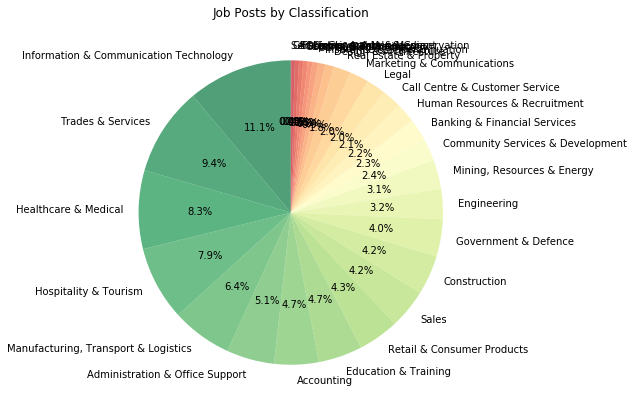

In [68]:
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(df_jobSec['Count'], labels=df_jobSec['Classification'], wedgeprops={'alpha':0.7}, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("RdYlGn_r", len(df_jobSec)))
ax.set_title('Job Posts by Classification', loc='center')

plt.show()

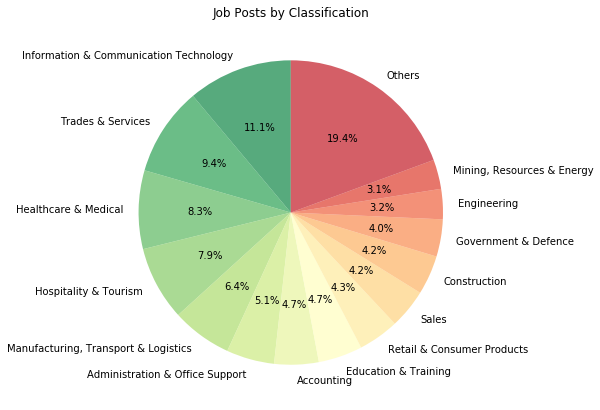

In [69]:
df_jobSecFiltered = df_jobSec[:14].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [df_jobSec["Count"][14:].sum()]
})
df_jobSecFiltered = pd.concat([df_jobSecFiltered, new_row],sort=False)
#df_jobSecFiltered

fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(df_jobSecFiltered['Count'], labels=df_jobSecFiltered['Classification'], wedgeprops={'alpha':0.7}, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("RdYlGn_r", len(df_jobSecFiltered)))
ax.set_title('Job Posts by Classification', loc='center')

plt.show()